In [3]:
print("Regresion Lineal")

Regresion Lineal


In [15]:
# Importamos las librerias necesarias 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Lectura de los datos en Python y lo cargamos en la variable de Datos

Datos = pd.read_csv('c:/CAR DETAILS FROM CAR DEKHO.csv')

In [84]:
# Verificar valores nulos
print("Valores Nulos:\n", df.isnull().sum())

# Verificar ceros en columnas numéricas (excluyendo 'year')
for col in df.select_dtypes(include=np.number):
    if col != 'year': # Excluimos la columna 'year'
        print(f"\nCeros en {col}:", (df[col] == 0).sum())

# Eliminar filas con valores nulos (si hay)
df = df.dropna()

# Eliminar filas con ceros en 'selling_price' y 'km_driven' (si es necesario)
df = df[(df['selling_price'] != 0) & (df['km_driven'] != 0)]

Valores Nulos:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
fuel_code        0
owner_code       0
dtype: int64

Ceros en selling_price: 0

Ceros en km_driven: 0

Ceros en fuel_code: 40

Ceros en owner_code: 2832


In [18]:
#Realizamos la lectura de los datos para el analisis exploratorio

Datos.head(8)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner


In [20]:
#Descripcion de los datos

Datos.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [126]:
# Codificar variables categóricas
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)

# Seleccionar características (¡Asegúrate de ejecutar esta celda!)
features = ['year', 'km_driven'] + [col for col in df.columns if col.startswith('fuel_') or col.startswith('seller_type_') or col.startswith('transmission_')]
target = 'selling_price'

X = df[features]
y = df[target]

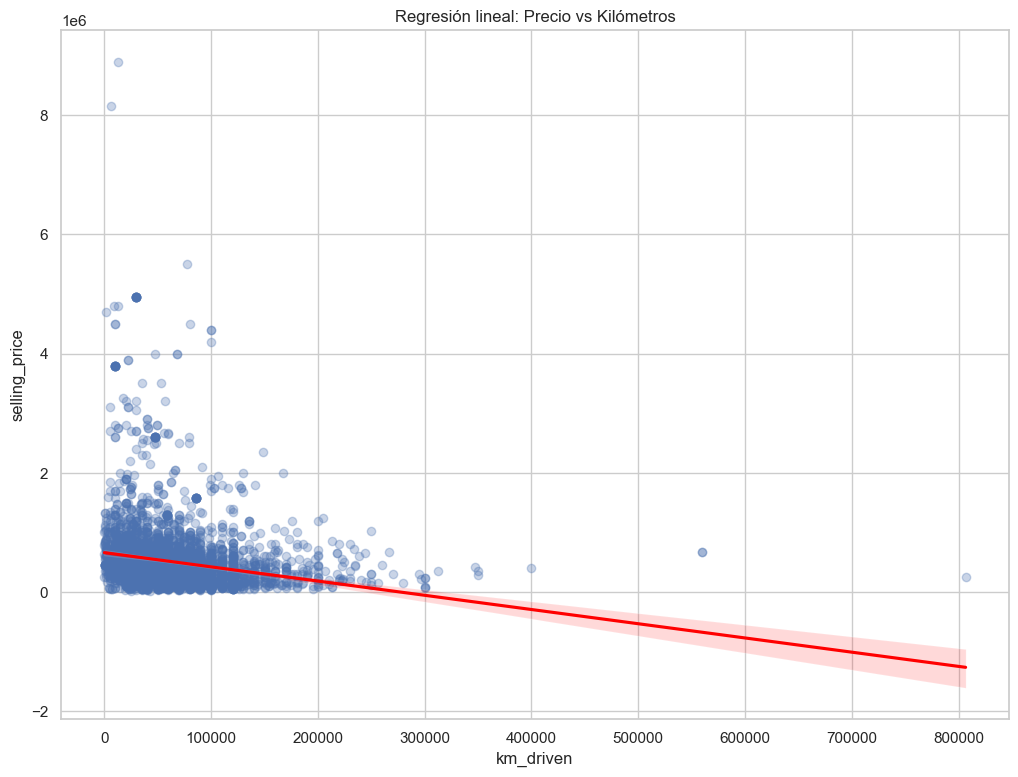

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('c:/CAR DETAILS FROM CAR DEKHO.csv')

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convertir columnas categóricas a numéricas temporales para graficar
df['fuel_code'] = df['fuel'].astype('category').cat.codes
df['owner_code'] = df['owner'].astype('category').cat.codes

# Crear subplots
plt.figure(figsize=(20, 15))

# 1. Precio vs. km_driven
plt.subplot(2, 2, 1)
sns.regplot(data=df, x='km_driven', y='selling_price', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Regresión lineal: Precio vs Kilómetros')


plt.tight_layout()
plt.show()


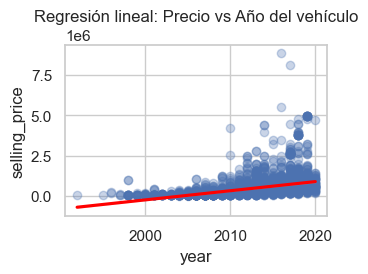

In [108]:
# 2. Precio vs. año
plt.subplot(2, 2, 2)
sns.regplot(data=df, x='year', y='selling_price', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Regresión lineal: Precio vs Año del vehículo')
plt.tight_layout()
plt.show()


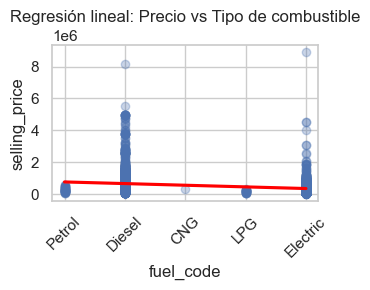

In [110]:
# 3. Precio vs. tipo de combustible
plt.subplot(2, 2, 3)
sns.regplot(data=df, x='fuel_code', y='selling_price', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Regresión lineal: Precio vs Tipo de combustible')
plt.xticks(ticks=range(len(df['fuel'].unique())), labels=df['fuel'].unique(), rotation=45)
plt.tight_layout()
plt.show()

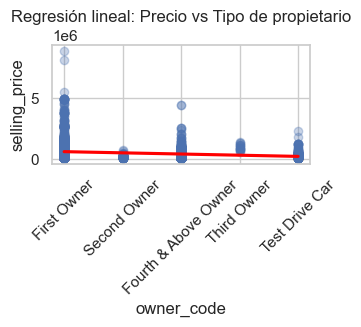

In [112]:

# 4. Precio vs. tipo de propietario
plt.subplot(2, 2, 4)
sns.regplot(data=df, x='owner_code', y='selling_price', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Regresión lineal: Precio vs Tipo de propietario')
plt.xticks(ticks=range(len(df['owner'].unique())), labels=df['owner'].unique(), rotation=45)
plt.tight_layout()
plt.show()

In [143]:
# 7. Predicciones con Nuevos Datos (¡CUIDADO CON LAS COLUMNAS!)
def predecir_precio_auto(modelo, datos_entrenamiento, nuevo_auto):

    # Convertir el nuevo auto a DataFrame si es un diccionario
    if isinstance(nuevo_auto, dict):
        nuevo_auto = pd.DataFrame([nuevo_auto])
    
    # Alinear las columnas del nuevo auto con las columnas de entrenamiento
    nuevo_auto = nuevo_auto.reindex(columns=datos_entrenamiento.columns, fill_value=0)

    # Asegurarse de que el orden de las columnas sea el correcto
    nuevo_auto = nuevo_auto[datos_entrenamiento.columns]  

    # Realizar la predicción
    precio_predicho = modelo.predict(nuevo_auto)[0]  # Obtener el valor escalar

    return precio_predicho


# Ejemplo de uso:
nuevo_auto_ejemplo = {
    'year': 2024,
    'km_driven': 5000,
    'fuel_Diesel': 0,
    'fuel_Petrol': 1,
    'fuel_LPG': 0,
    'seller_type_Individual': 1,
    'seller_type_Trustmark Dealer': 0,
    'transmission_Manual': 1
}


In [152]:
# Ejemplo con DataFrame
nuevo_auto_df = pd.DataFrame({
    'year': [2023],
    'km_driven': [12000],
    'fuel_Diesel': [1],
    'fuel_Petrol': [0],
    'fuel_LPG': [0],
    'seller_type_Individual': [0],
    'seller_type_Trustmark Dealer': [1],
    'transmission_Manual': [0]
})

precio_predicho_df = predecir_precio_auto(model, X_train, nuevo_auto_df)
print(f"Precio predicho (DataFrame): {precio_predicho_df:.2f}")


Precio predicho (DataFrame): 2131963.93


In [154]:
print ("el ejemplo predice el precio de un carro del año 2024, con 5000 kilómetros recorridos, que usa gasolina, vendido por un particular y con transmisión manual.");

el ejemplo predice el precio de un carro del año 2024, con 5000 kilómetros recorridos, que usa gasolina, vendido por un particular y con transmisión manual.
